In [2]:
 pip install --upgrade pip

^C
Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [49]:
#reading the data
df = pd.read_csv("C:/Users/PRIYAN/Downloads/spam.csv", encoding='latin1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [50]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [51]:
df.duplicated().sum()

403

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [53]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


## DELETING UNWANTED COLUMNS

In [54]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [55]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


## Rename the columns

In [56]:
df.columns=["Target","Message"]

In [57]:
df.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df["Target"].replace("ham",0,inplace=True)
df["Target"].replace("spam",1,inplace=True)

C:\Users\PRIYAN\AppData\Local\Temp\ipykernel_15832\3614011350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Target"].replace("ham",0,inplace=True)
C:\Users\PRIYAN\AppData\Local\Temp\ipykernel_15832\3614011350.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [59]:
df.head(2)

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [60]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [61]:
df.duplicated().sum()

403

In [62]:
df.shape

(5572, 2)

In [63]:
df=df.drop_duplicates()

In [64]:
df.shape

(5169, 2)

##EDA

In [65]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

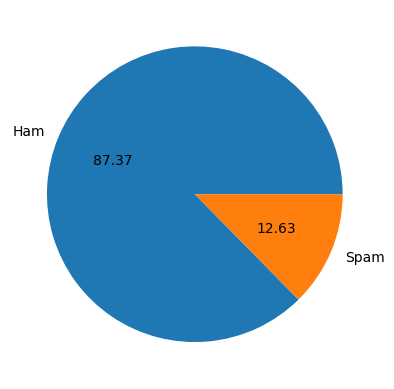

In [66]:
plt.pie(df["Target"].value_counts(),labels=["Ham","Spam"],autopct="%.2f")
plt.show()

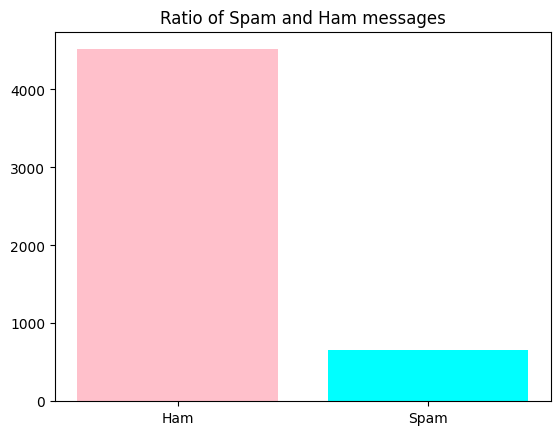

In [67]:
X=["Ham","Spam"]
Y=df["Target"].value_counts()
plt.bar(X,Y,color=["pink","cyan"])
plt.title("Ratio of Spam and Ham messages")
plt.show()

### Word Cloud to check the word with max frequency that appears in Spam

In [68]:
from wordcloud import WordCloud

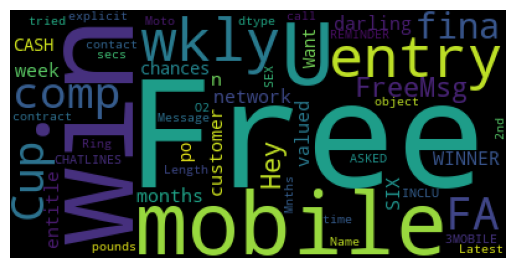

In [69]:

text=str(df[df["Target"]==1]["Message"])

##Generating wordcloud
wordcloud = WordCloud().generate(text)
# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [26]:
### WORDCLOUD FOR HAM

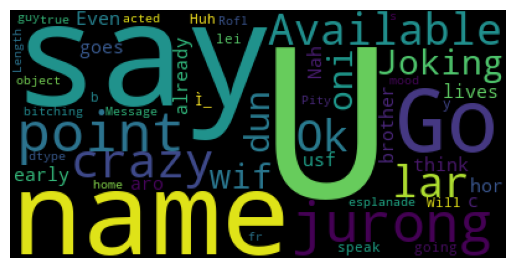

In [70]:
text=str(df[df["Target"]==0]["Message"])

##Generating wordcloud
wordcloud = WordCloud().generate(text)
# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Data Preprocessing

In [71]:
# REMOVE URL's.
import re
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

In [72]:
#REMOVE PUNCTUATIONS
import re

def remove_punctuations(text):
    text=re.sub(r"[^A-Za-z0-9\s]","",text)
    return text

In [73]:
#REMOVE STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopword(text):
    stop_words = stopwords.words('english')  # Specify 'english' for English stopwords
    temp_text = word_tokenize(text)

    for word in temp_text:
        if word in stop_words:
            text=text.replace(word,"")
    return text

In [74]:
from nltk.stem import PorterStemmer
def Stemming(text):
    ps = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_words = []
    for token in tokens:
        stemmed_token = ps.stem(token)
        stemmed_words.append(stemmed_token)
    return ' '.join(stemmed_words)

In [75]:
def transform(text):
    text=text.lower()
    text=remove_urls(text)
    text=remove_punctuations(text)
    text=remove_stopword(text)
    text=Stemming(text)

    return text

In [76]:
df.columns

Index(['Target', 'Message'], dtype='object')

In [77]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\PRIYAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\PRIYAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\PRIYAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\PRIYAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\PRIYAN\AppData\Roaming\nltk_data

True

In [78]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [79]:
df["transformed"] = df["Message"].apply(transform)
df.head(2)

C:\Users\PRIYAN\AppData\Local\Temp\ipykernel_15832\2636847829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed"] = df["Message"].apply(transform)


,Target,Message,transformed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong pot crazi avail bugi n great world l...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni


In [81]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df["transformed"]).toarray() 
print(X)
#0.99 precison   but is it is classifying 20 spam as not spam(False Negative)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [82]:
#TF IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(df["transformed"]).toarray()

#NO False Negative

In [86]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
import joblib
joblib.dump(tf,"tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [85]:
Y=df["Target"]

In [87]:
X.shape

(5169, 9720)

In [90]:
### splitting 

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [ ]:
print(len(X_train))
print(len(X_test))

#### Model Building 

In [91]:
from sklearn.naive_bayes import MultinomialNB

mnb_model=MultinomialNB()
mnb_model.fit(X_train,Y_train)

MultinomialNB()

In [94]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(X_train,Y_train)

GaussianNB()

In [95]:
from sklearn.naive_bayes import BernoulliNB
bnb_model=BernoulliNB()
bnb_model.fit(X_train,Y_train)

BernoulliNB()

In [96]:
#since data is not balanced, we will not rely on just accuracy, precision would be a better metric
from sklearn.metrics import precision_score
Y_pred=bnb_model.predict(X_test)
precision=precision_score(Y_test,Y_pred)
print(precision)

0.9734513274336283


#### confusion matrix

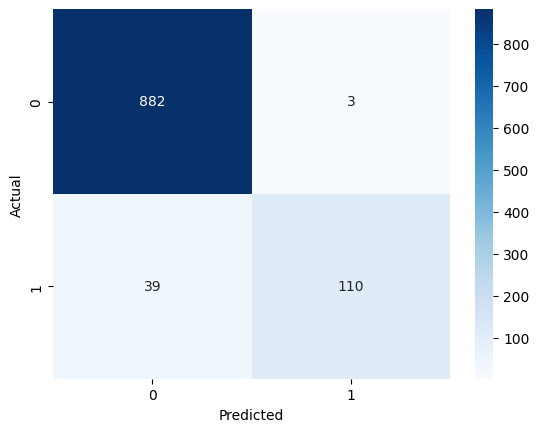

In [97]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [98]:
#since data is not balanced, we will not rely on just accuracy, precision would be a better metric
from sklearn.metrics import precision_score
Y_pred=mnb_model.predict(X_test)
precision=precision_score(Y_test,Y_pred)
print(precision)

1.0


In [ ]:
### so the multinomial naive bayes would be the opt algorithm for this classifciation problem 

#### saving the model

In [99]:
import joblib
joblib.dump(bnb_model,"saved_model.pkl")

['saved_model.pkl']

In [100]:
import joblib
joblib.dump(mnb_model,"MNB_model.pkl")

['MNB_model.pkl']